In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

!pip install pycountry
!pip install langdetect

     |████████████████████████████████| 10.1 MB 4.0 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=a219c6becce678c10b1c14f5bd01f6934e81c4f9d9eeceffc9358298d0ac819f
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry
     |████████████████████████████████| 981 kB 4.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=5e639ddcd4ea85db7fff5eea0e254b99e9cc92a279dc7e304bc2ca462ebaab08
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import time
import seaborn as sns
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Authentication 
#Chuka's keys
consumerKey = ''
consumerSecret = ''
accessToken = ''
accessTokenSecret = ''
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)
# places = api.geo_search(query="NIGERIA", granularity="country")
# place_id = places[0].id

In [ ]:
#Spool tweets 

text_query = 'pension' + ' -filter:retweets'
coords = "9.072264,7.491302,600km" #Search within a 600km radius from abuja (center of Nigeria)

count = 7000
try:
    tweets = tweepy.Cursor(api.search, q=text_query, geocode = coords , since = "2021-06-01").items(count)
    tweets_list = [[tweet.user.screen_name,tweet.user.location, tweet.user.followers_count,
                    tweet.retweet_count,tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
    tweets_df = pd.DataFrame(tweets_list)
    tweets_df.rename(columns = {0:'User', 1:'location', 2:'Followers',3:'retweets',4:'date_created',
                               5:'tweet_id',6:'text'}, inplace = True)

except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)


# tweets_df.rename(columns = {0:'User', 1:'location',2:'Followers',3:'retweets',4:'date_created',
#                                5:'tweet_id',6:'text'}, inplace = True)
print(len(tweets_df))
tweets_df.head()

348


,User,location,Followers,retweets,date_created,tweet_id,text
0,prospa_official,"Abuja, Nigeria",1256,0,2021-08-09 12:23:17,1424707857895858177,@FCBarcelona @aguerosergiokun Pension club
1,officiallilier,Abuja,11559,3,2021-08-09 12:20:33,1424707170382319622,When u know how to spend your pension free sel...
2,PensionTalkng,"Lagos, Nigeria",209,0,2021-08-09 12:13:30,1424705395457671170,Following the Guidelines for the Micro Pension...
3,PelMedic,"Lagos, Nigeria",837,0,2021-08-09 11:39:51,1424696927543693317,Nottingham-based company ran unregistered pens...
4,Yinkerthinker,"Ibadan, Nigeria",434,0,2021-08-09 11:16:00,1424690924223934464,@latunji @barcacentre @gerardromero Why are yo...


In [ ]:

# def extract_Nig(txt):
#   end = txt.find('Nigeria')
#   if end==-1:
#     return txt
#   else:
#     return 'Nigeria'

# tweets_df['location'] = tweets_df['location'].apply(lambda x: extract_Nig(x))
# tweets_df = tweets_df[tweets_df['location']=='Nigeria']
# print(len(tweets_df))
# tweets_df

##Sentiment Analysis

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [ ]:
# Derive different sentiments

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets_df.text:
  tweet_list.append(tweet)
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet)
    positive += 1
  
  elif pos == neg:
    neutral_list.append(tweet)
    neutral += 1

positive = percentage(positive, len(tweet_list))
negative = percentage(negative, len(tweet_list))
neutral = percentage(neutral, len(tweet_list))
polarity = percentage(polarity, len(tweet_list))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ', len(tweet_list))
print('positive number: ', len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ', len(neutral_list))

total number:  348
positive number:  115
negative number:  106
neutral number:  127


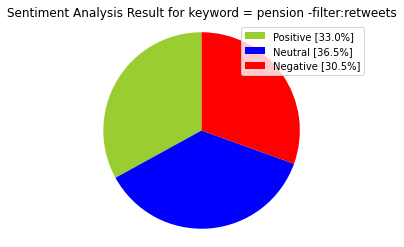

In [ ]:
#Creating PieChart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword = '+ text_query )
plt.axis('equal')
plt.show()

##Clean Tweets to analyse sentiment

In [ ]:
tweet_list.drop_duplicates(inplace = True)    # Drop duplicates
len(tweet_list)

348

In [ ]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

In [ ]:
# function for text pre-processing
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words to lemma                               
    
    return newString.strip() 

In [ ]:
# function for text pre-processing
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters

    return letters_only

In [ ]:
# # function for text pre-processing
# def tweet_cleaner(text):
#     newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
#     newString=re.sub("#","",newString)                             #removing hashtag symbol
#     newString= re.sub(r'http\S+', '', newString)                   #removing links
#     newString= re.sub(r"'s\b","",newString)                        #removing 's
#     letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
#     lower_case = letters_only.lower()                              #converting everything to lowercase

#     return lower_case

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features



tw_list = pd.DataFrame(tweet_list)
# tw_list['text'] = tw_list[0]

# empty list to store tweets after pre-processing
cleaned_tweets = []

# pre-processing the tweets
for i in tw_list[0]:
    cleaned_tweets.append(tweet_cleaner(i))

#creating new column  
tw_list['text']= cleaned_tweets
tw_list

,0,text
0,@FCBarcelona @aguerosergiokun Pension club,pension club
1,When u know how to spend your pension free sel...,u know spend pension free selfie certain
2,Following the Guidelines for the Micro Pension...,following guideline micro pension plan mpp pub...
3,Nottingham-based company ran unregistered pens...,nottingham based company ran unregistered pens...
4,@latunji @barcacentre @gerardromero Why are yo...,surprised pension
...,...,...
343,Hey #AMC …thoughts on #TLRY stock? I know you ...,hey amc thought tlry stock know financial advi...
344,"How can you build ur career so strong, best in...",build ur career strong best country solve hard...
345,@kins7615 @temi_jon @ogundamisi How as the pro...,jon progress agric reduction food importation ...
346,Urgent Recruitment!\n\nWe are currently recrui...,urgent recruitment currently recruiting fill p...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
  
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
  
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@FCBarcelona @aguerosergiokun Pension club,pension club,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,When u know how to spend your pension free sel...,u know spend pension free selfie certain,0.307143,0.685714,positive,0.000,0.426,0.574,0.6597
2,Following the Guidelines for the Micro Pension...,following guideline micro pension plan mpp pub...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000
3,Nottingham-based company ran unregistered pens...,nottingham based company ran unregistered pens...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,@latunji @barcacentre @gerardromero Why are yo...,surprised pension,0.100000,0.900000,positive,0.000,0.345,0.655,0.2263
5,@LauraSmithCrewe They don't mention over a dec...,mention decade pay freeze pay pension cut alwa...,0.000000,0.000000,negative,0.441,0.450,0.108,-0.4019
6,@StockNinja_JJ Have you heard anything about T...,jj heard anything tlry looking think ready go ...,0.200000,0.500000,positive,0.000,0.640,0.360,0.5423
7,"Olanrewaju Suraju, the chairperson of the HEDA...",olanrewaju suraju chairperson heda say make se...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,One of the most important things that you shou...,one important thing never forget pension plan ...,0.450000,0.750000,positive,0.000,0.441,0.559,0.7824
9,A true industry first by ⁦@AXISPENSION⁩ and Ho...,true industry first hollard life enjoy free li...,0.350000,0.570833,positive,0.000,0.492,0.508,0.8519


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
neutral,105,40.86
negative,80,31.13
positive,72,28.02


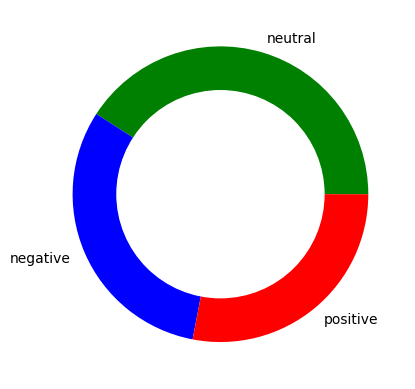

In [ ]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,'sentiment')
names= piechart.index
size=piechart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig(text_query + '_doughnut_chart.png')
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text, pol):
#  mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file(text_query + '_' + pol + '_'+'wc.png')
 print('Word Cloud Saved Successfully')
 path= text_query + '_' + pol + '_'+'wc.png'
 display(Image.open(path))

Word Cloud Saved Successfully


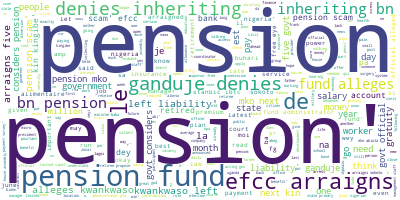

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values, 'neutral')

Word Cloud Saved Successfully


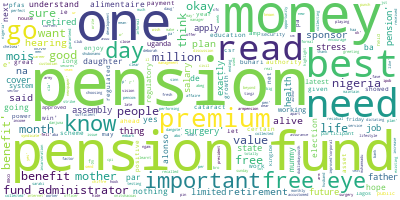

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values, 'positive')

Word Cloud Saved Successfully


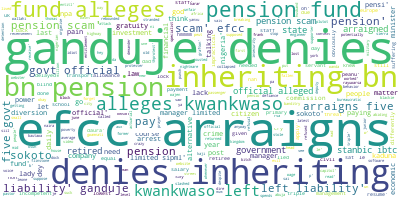

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values, 'negative')

In [ ]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,62.25
neutral,52.60
positive,65.24


In [ ]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,9.76
neutral,8.52
positive,10.11


In [ ]:
len(tw_list_negative[0])

80

##Top 25 trending hashtags from tweets

In [ ]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.savefig(text_query + '_hashtag_frequency_dist.png')
    plt.show()

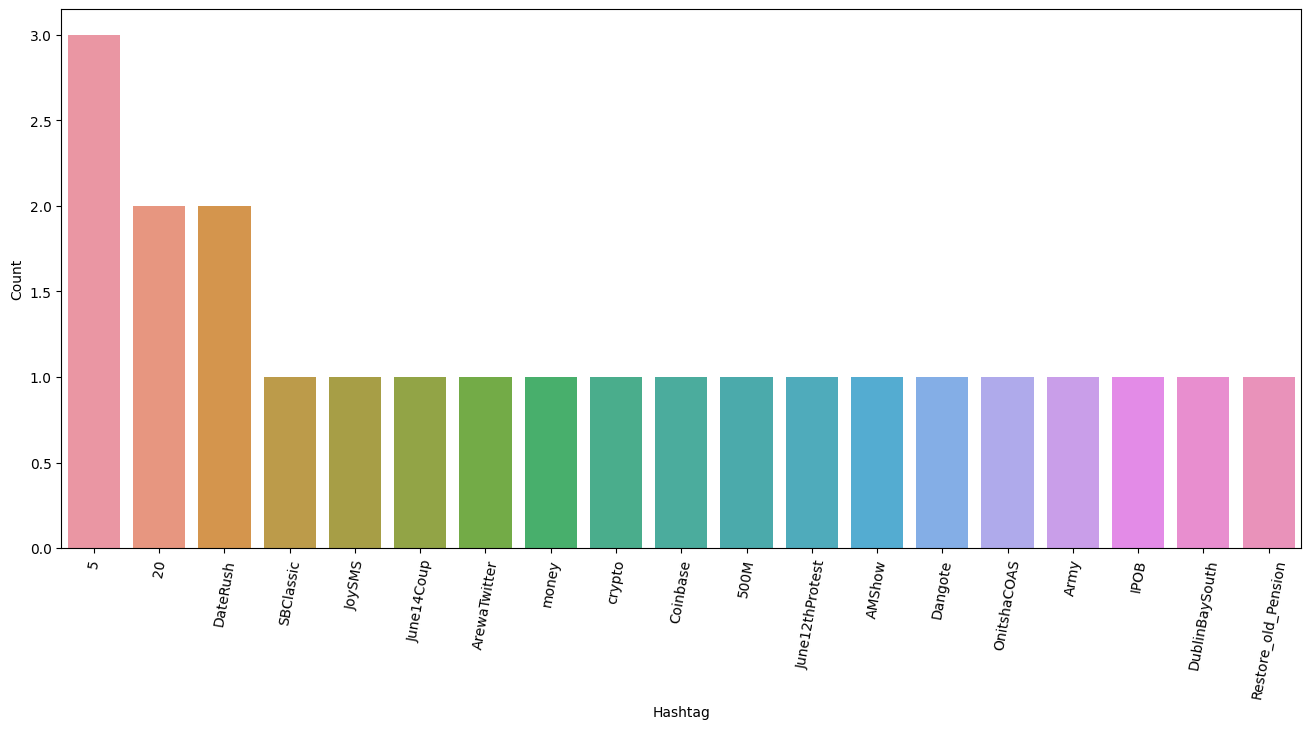

In [ ]:
hashtags = hashtag_extract(tw_list[0])
hashtags = sum(hashtags, [])

generate_hashtag_freqdist(hashtags)

In [ ]:
# tw_list[[0, 'sentiment']].rename(columns={0:'text'}).to_csv('pension_tweets_with_sentiments.csv')

In [ ]:
tbl = tw_list[[0, 'sentiment']].rename(columns={0:'text'})

In [ ]:
positive = tbl[tbl['sentiment']=='positive']
negative = tbl[tbl['sentiment']=='negative']
neutral = tbl[tbl['sentiment']=='neutral']

with pd.ExcelWriter('pension_tweets_with_sentiment.xlsx') as writer:
  positive.to_excel(writer, sheet_name='positive', index=False)
  negative.to_excel(writer, sheet_name='negative', index=False)
  neutral.to_excel(writer, sheet_name='neutral', index=False)


##Some additional stuff i'm still trying to play around with

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = ''.join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"Became president at an early age, after being ...",became president early age kick office never w...,0.1,0.3,neutral,0.0,1.000,0.000,0.0000,79,12,became president early age kick office never w...,"[became, president, early, age, kick, office, ...","[became, president, early, age, kick, office, ...","[becam, presid, earli, age, kick, offic, never..."
1,✔️Fruit of the womb🤰🏽given to one with 2° infe...,fruit womb given one infertility picca healed ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,77,12,fruit womb given one infertility picca healed ...,"[fruit, womb, given, one, infertility, picca, ...","[fruit, womb, given, one, infertility, picca, ...","[fruit, womb, given, one, infertil, picca, hea..."
2,CM – CFC secures pension fund and ILS money fo...,cm cfc secures pension fund il money syndicate,0.0,0.0,positive,0.0,0.753,0.247,0.3182,46,8,cm cfc secures pension fund il money syndicate,"[cm, cfc, secures, pension, fund, il, money, s...","[cm, cfc, secures, pension, fund, il, money, s...","[cm, cfc, secur, pension, fund, il, money, syn..."
3,@MiszEne Learnt there won’t any more pension a...,learnt pension real,0.2,0.3,neutral,0.0,1.000,0.000,0.0000,19,3,learnt pension real,"[learnt, pension, real]","[learnt, pension, real]","[learnt, pension, real]"
4,"@MiszEne Just send me the money monthly, I wil...",send money monthly hook perfect pension plan,1.0,1.0,positive,0.0,0.619,0.381,0.5719,44,7,send money monthly hook perfect pension plan,"[send, money, monthly, hook, perfect, pension,...","[send, money, monthly, hook, perfect, pension,...","[send, money, monthli, hook, perfect, pension,..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
# 1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

257 Number of reviews has 1025 words


,,aba,abeg,abi,abid,abiola,abl,abo,abuja,accept,access,account,accur,accustom,achiev,across,act,actual,actuari,administr,advis,affair,africa,age,ah,ahead,ai,airtim,aka,alab,alay,aliment,alimentair,aliv,all,alleg,allow,alonso,alreadi,also,...,wanda,want,wasnt,way,wear,websit,webster,week,wey,whatev,whenev,wif,wife,win,wish,woman,womb,wor,work,worker,world,worri,would,write,wrong,ya,yanxu,yarda,ye,year,yearli,yesterday,yet,york,yr,yup,yusuf,z,zan,zonal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
n,50
fund,37
efcc,21
arraign,20
alleg,20
offici,19
scam,18
govt,18
b,17
five,17


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('pension fund', 28),
 ('pension scam', 18),
 ('efcc arraigns', 15),
 ('ganduje denies', 13),
 ('denies inheriting', 13),
 ('inheriting bn', 13),
 ('bn pension', 13),
 ('fund alleges', 13),
 ('alleges kwankwaso', 13),
 ('kwankwaso left', 13),
 ('left liability', 13),
 ('pension mko', 11),
 ('considers pension', 10),
 ('govt official', 9),
 ('official pension', 9),
 ('mko kin', 9),
 ('kin kingibe', 9),
 ('arraigns govt', 8),
 ('govt considers', 8),
 ('la pension', 6)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('ganduje denies inheriting', 13),
 ('denies inheriting bn', 13),
 ('inheriting bn pension', 13),
 ('bn pension fund', 13),
 ('pension fund alleges', 13),
 ('fund alleges kwankwaso', 13),
 ('alleges kwankwaso left', 13),
 ('kwankwaso left liability', 13),
 ('considers pension mko', 10),
 ('official pension scam', 9),
 ('pension mko kin', 9),
 ('efcc arraigns govt', 8),
 ('arraigns govt official', 8),
 ('govt official pension', 8),
 ('govt considers pension', 8),
 ('mko kin kingibe', 8),
 ('pension fund administrator', 6),
 ('stanbic ibtc pension', 5),
 ('efcc arraigns sokoto', 5),
 ('ibtc pension manager', 4)]